In [251]:
import numpy as np


def adjust_lr(last_epoch,T_mul = 2,T_0=150,T_mult=1.5,eta_min=0.001,eta_max=0.1):
        step_num = last_epoch
        if T_mul == 2:
            i = np.log2(step_num / T_0 + 1).astype(np.int32)
            T_cur = step_num - T_0 * (T_mult ** (i) - 1)
            T_i = (T_0 * T_mult ** i)
        elif T_mul == 1:
            T_cur = step_num % T_0
            T_i = T_0
        cur_lr = eta_min + 0.5 * (eta_max - eta_min) * (1 + np.cos(np.pi * T_cur / T_i))
        return cur_lr

def adjust_lrss(last_epoch,T_0=1500,T_mult=0.99999,eta_min=0.001):
    step_num = last_epoch + 1

    cur_lr = eta_min* T_mult ** step_num+np.cos(np.pi * step_num / T_0 )*0.00005 +np.random.randint(-5,5)*0.00000005*(T_mult ** step_num*10)
    return cur_lr

def cpxadjust_lrss(last_epoch,T_0=1500,T_mult=0.99999,eta_min=0.001,T_mults=0.9):
    step_num = last_epoch + 1

    cur_lr = eta_min* T_mult ** step_num + (T_mults**(step_num // T_0 ))*np.cos(np.pi * step_num / (T_0-((step_num // T_0 ))*200) )*0.00005
    return cur_lr


def ctxadjust_lr(last_epoch,T_mul = 1,T_0=15000,T_mult=1.5,eta_min=0.0000001,eta_max=0.00006,tmctx=0.95,ws=8000):
        step_num = last_epoch+1
        if T_mul == 2:
            i = np.log2(step_num / T_0 + 1).astype(np.int32)
            T_cur = step_num - T_0 * (T_mult ** (i) - 1)
            T_i = (T_0 * T_mult ** i)
        elif T_mul == 1:
            T_cur = (step_num +ws) % T_0
            T_i = T_0
            T_curX = (step_num +ws)// T_0


        cur_lr = eta_min + 0.5 * (eta_max *(tmctx**T_curX)- eta_min*(tmctx**T_curX)) * (1 + np.cos(np.pi * T_cur / T_i))
        if ws>step_num:
            cur_lr=step_num*(eta_max/ws)

        return cur_lr


def mmmctxadjust_lr(last_epoch,T_0=15000,eta_min=0.00004,eta_max=0.00006,tmctx=0.99):
        step_num = last_epoch+1

        T_cur = (step_num ) % T_0
        T_i = T_0
        T_curX = (step_num)// T_0


        cur_lr = eta_min*(tmctx**T_curX) + 0.5 * (eta_max *(tmctx**T_curX)- eta_min*(tmctx**T_curX)) * (1 + np.cos(np.pi * T_cur / T_i))


        return cur_lr

def mmmctxadjust_lrss(last_epoch,T_0=15000,eta_min=0.00004,eta_max=0.00006,tmctx=0.98,ws=5000):
        step_num = last_epoch+1

        T_cur = (step_num +ws) % T_0
        T_i = T_0
        T_curX = (step_num +ws)// T_0


        cur_lr = eta_min*(tmctx**T_curX) + 0.5 * (eta_max *(tmctx**T_curX)- eta_min*(tmctx**T_curX)) * (1 + np.cos(np.pi * T_cur / T_i))
        if ws>step_num:
            cur_lr=step_num*(eta_max/ws)

        return cur_lr


        return cur_lr


100%|██████████| 2000000/2000000 [00:07<00:00, 267758.41it/s]


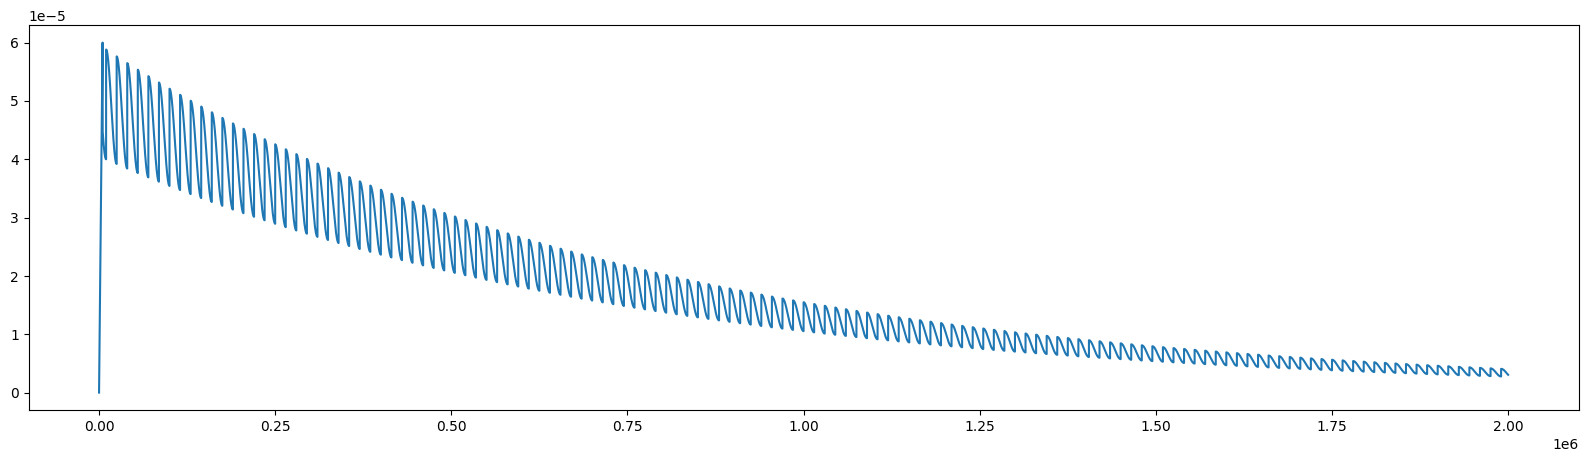

In [252]:
from tqdm import tqdm
import random
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import axes
csc=[]
sss=[]
fff=plt.figure(figsize=(20,5))

for i in tqdm(range(2000000)):
    csc.append(i)
    sss.append(mmmctxadjust_lrss(i))
    if ctxadjust_lr(i)<0:
        print('cccccccccccccccc')

plt.plot(csc,sss)
plt.show()




100%|██████████| 500/500 [00:00<00:00, 166586.07it/s]


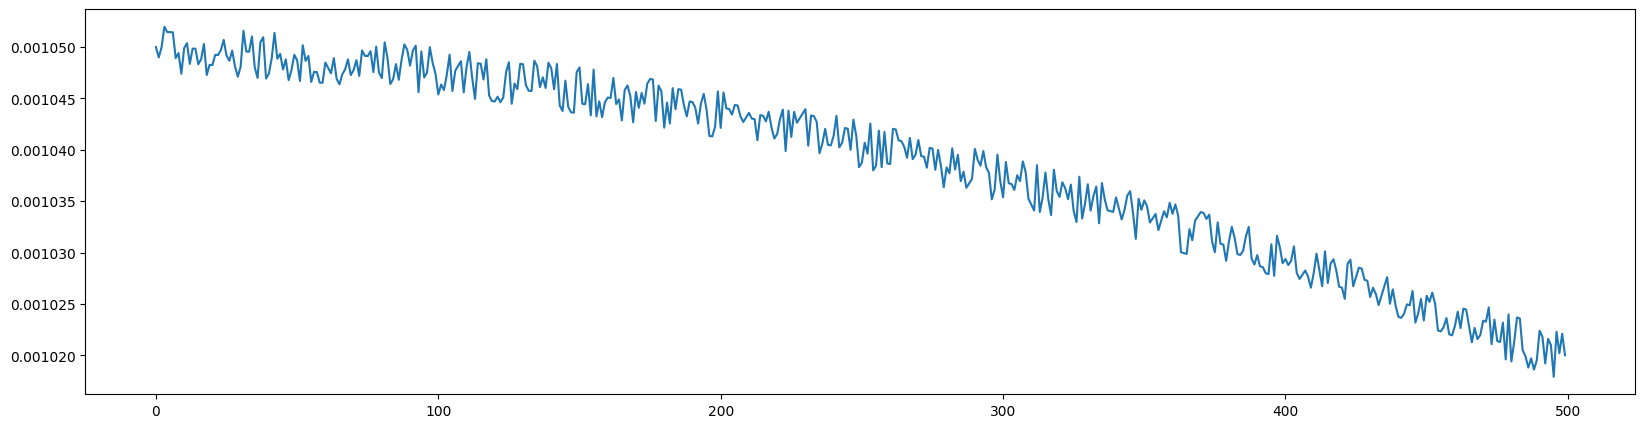

In [158]:
from tqdm import tqdm
import random
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import axes
csc=[]
sss=[]
fff=plt.figure(figsize=(20,5))

for i in tqdm(range(500)):
    csc.append(i)
    sss.append(adjust_lrss(i))
    if ctxadjust_lr(i)<0:
        print('cccccccccccccccc')

plt.plot(csc,sss)
plt.show()


100%|██████████| 50000/50000 [00:00<00:00, 286827.67it/s]


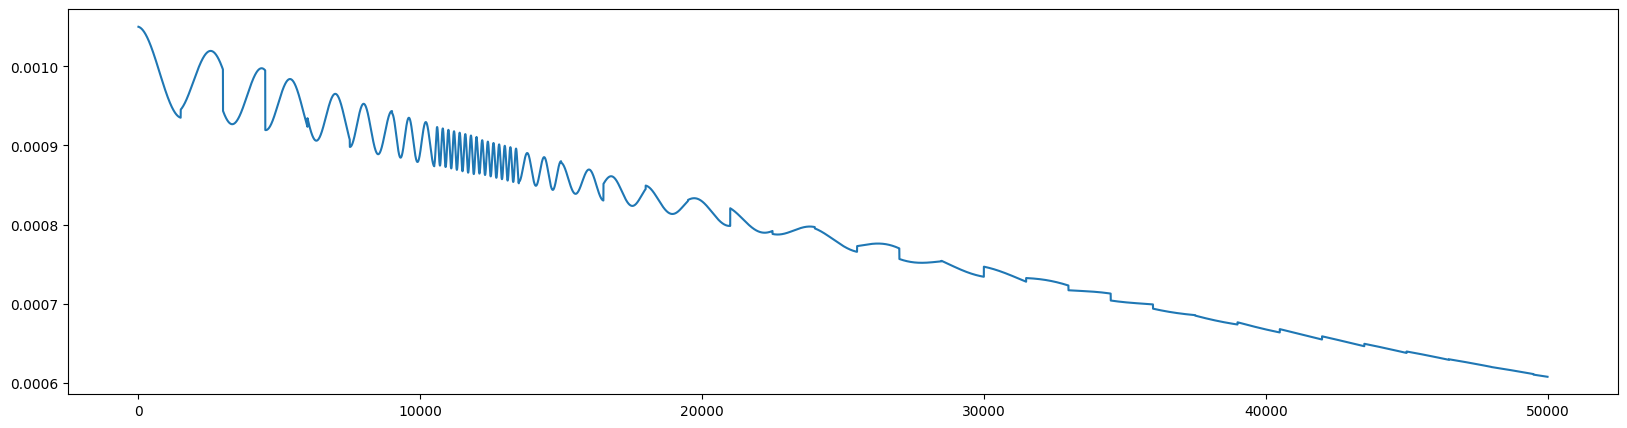

In [216]:
from tqdm import tqdm
import random
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import axes
csc=[]
sss=[]
fff=plt.figure(figsize=(20,5))

for i in tqdm(range(50000)):
    csc.append(i)
    sss.append(cpxadjust_lrss(i))
    if ctxadjust_lr(i)<0:
        print('cccccccccccccccc')

plt.plot(csc,sss)
plt.show()

100%|██████████| 5000000/5000000 [00:18<00:00, 267077.87it/s]


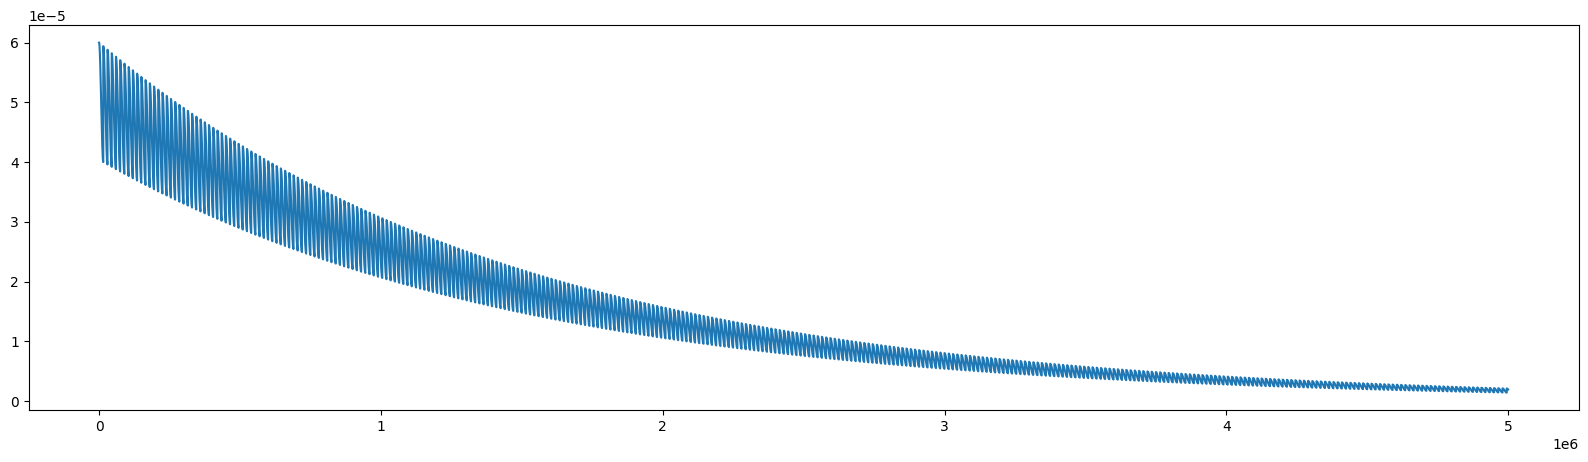

In [233]:
from tqdm import tqdm
import random
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import axes
csc=[]
sss=[]
fff=plt.figure(figsize=(20,5))

for i in tqdm(range(5000000)):
    csc.append(i)
    sss.append(mmmctxadjust_lr(i))
    if ctxadjust_lr(i)<0:
        print('cccccccccccccccc')

plt.plot(csc,sss)
plt.show()

100%|██████████| 50000/50000 [00:00<00:00, 282299.86it/s]


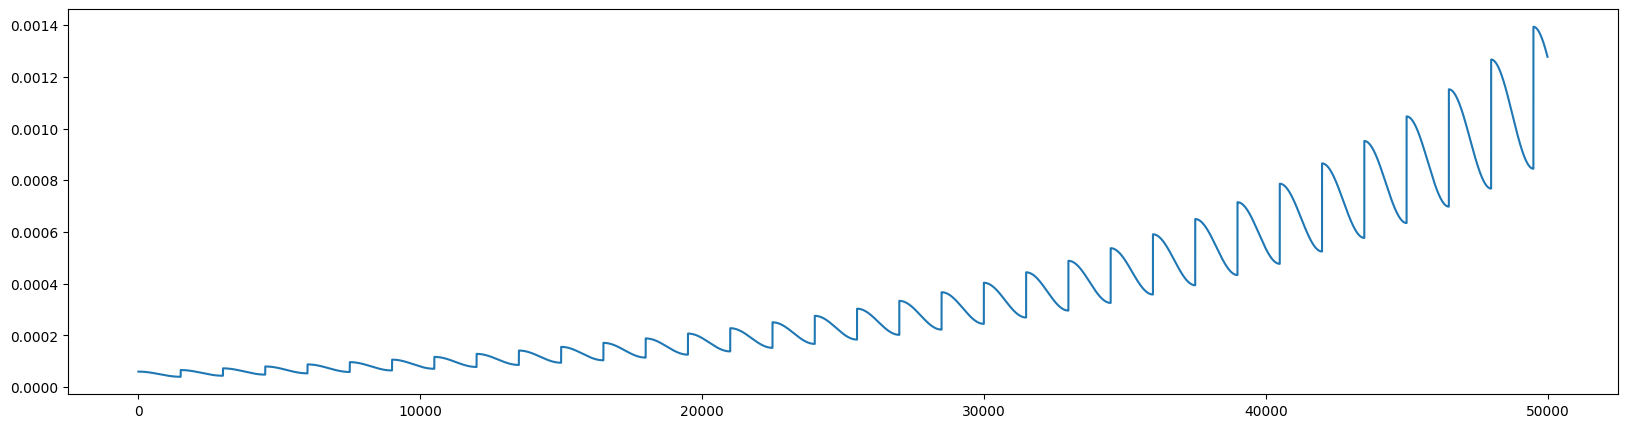

In [284]:
from tqdm import tqdm
import random
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import axes
csc=[]
sss=[]
fff=plt.figure(figsize=(20,5))

for i in tqdm(range(50000)):
    csc.append(i)
    sss.append(mmmctxadjust_lr(i,tmctx=1.1,T_0=1500))
    if ctxadjust_lr(i)<0:
        print('cccccccccccccccc')

plt.plot(csc,sss)
plt.show()

In [280]:
ix=256
ink=[5,5,5,5,5]
ins=[2,2,2,2,2]
inp=[2,2,2,2,2]

for i in zip(ink,ins,inp):
    ii,iii,iiii=i
    ix=int((ix+2*iiii-ii)/iii) +1
print(ix)
ink=[5,5,5,5,6]
ins=[2,2,2,2,2]
inp=[1,2,2,2,3]
cx=8
for i in zip(ink,ins,inp):
    ii,iii,iiii=i
    cx=(cx-1)*iii+ii-2*iiii
print(cx)



8
256
